In [37]:
pip install pycaret

In [38]:
import pandas as pd
data = pd.read_csv('clean_data.csv')
data = data.drop(data.columns[0], axis=1)
print(data.head())

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  frequent_consumption_of_high_caloric_food  \
0                                       yes   
1                                       yes   
2                                       yes   
3                                       yes   
4                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.000000              2.983297   
1                                2.000000              3.000000   
2                            

import libraries and setup initialization

In [39]:
from pycaret.classification import *
clf = setup(data, target = 'obesity_level')

,Description,Value
0,Session id,8719
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3499, 27)"
7,Transformed test set shape,"(1500, 27)"
8,Numeric features,9
9,Categorical features,8


In [40]:
clf = setup(data, target = 'obesity_level',train_size = 0.8, session_id = 123)

# we have training data in clf[0] and test data in clf[1]

,Description,Value
0,Session id,123
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 18)"
5,Transformed data shape,"(4999, 27)"
6,Transformed train set shape,"(3999, 27)"
7,Transformed test set shape,"(1000, 27)"
8,Numeric features,9
9,Categorical features,8


We can easily find out best model using compare_models

In [42]:
bestModel = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8900,0.0000,0.8900,0.8911,0.8896,0.8710,0.8714,6.5220
lightgbm,Light Gradient Boosting Machine,0.8880,0.9871,0.8880,0.8894,0.8876,0.8687,0.8691,10.0590
xgboost,Extreme Gradient Boosting,0.8860,0.9869,0.8860,0.8873,0.8856,0.8664,0.8667,1.2000
rf,Random Forest Classifier,0.8772,0.9849,0.8772,0.8781,0.8759,0.8560,0.8566,1.1210
et,Extra Trees Classifier,0.8370,0.9764,0.8370,0.8374,0.8356,0.8088,0.8093,0.7820
dt,Decision Tree Classifier,0.8165,0.8940,0.8165,0.8193,0.8162,0.7849,0.7855,0.3930
lda,Linear Discriminant Analysis,0.8117,0.0000,0.8117,0.8113,0.8095,0.7793,0.7799,0.3200
ridge,Ridge Classifier,0.6332,0.0000,0.6332,0.6279,0.6018,0.5682,0.5752,0.1980
lr,Logistic Regression,0.6314,0.0000,0.6314,0.6206,0.6107,0.5653,0.5694,1.9950
nb,Naive Bayes,0.6129,0.9160,0.6129,0.6202,0.5829,0.5457,0.5552,0.2980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

visualizing predictions

Best model basing on time

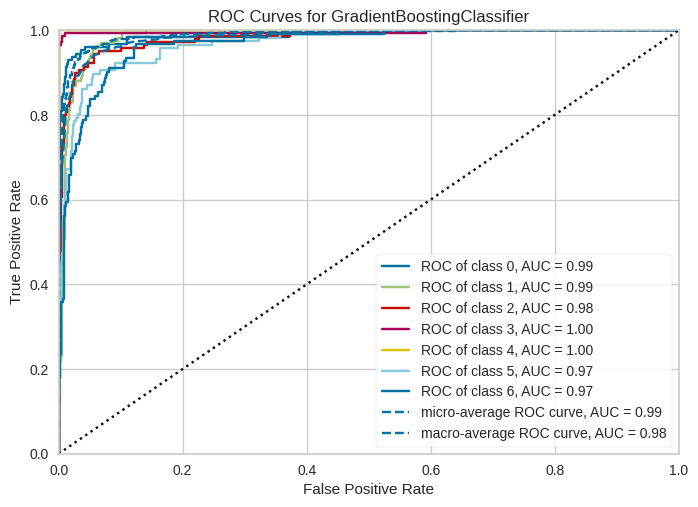

In [47]:
# as this is our best model
plot_model(bestModel)

In [48]:
#Predictions on entire data
predictions = predict_model(bestModel, data = data)
print(predictions.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9448,0.9955,0.9448,0.9447,0.9447,0.9353,0.9353


   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443010  1.699998   81.669952                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165752                            yes   
3   3  Female  20.952738  1.710730  131.274857                            yes   
4   4    Male  31.641081  1.914186   93.798058                            yes   

  frequent_consumption_of_high_caloric_food  \
0                                       yes   
1                                       yes   
2                                       yes   
3                                       yes   
4                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.000000              2.983297   
1                                2.000000              3.000000   
2                            

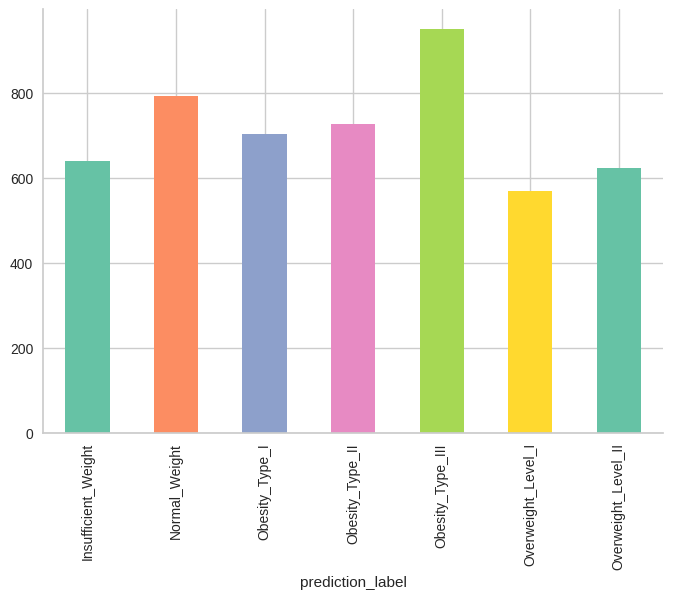

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
predictions.groupby('prediction_label').size().plot(kind='bar', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

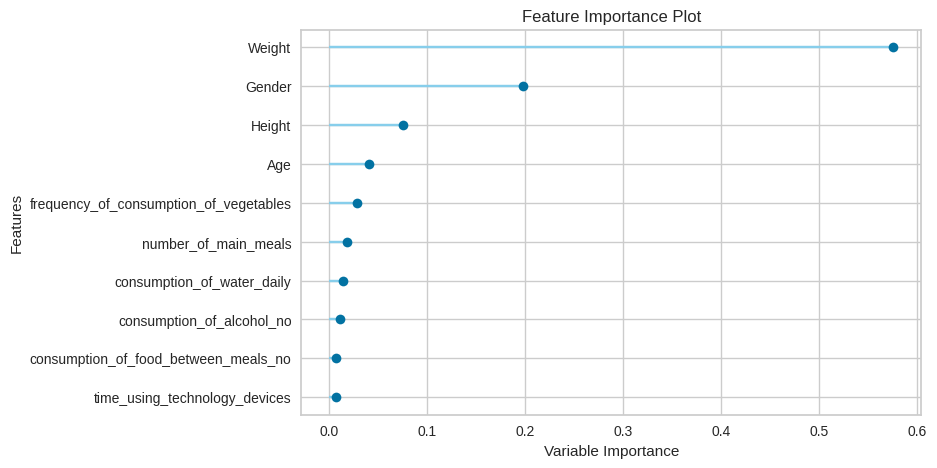

In [50]:
finalized_model = finalize_model(bestModel)
plot_model(finalized_model, plot='feature')

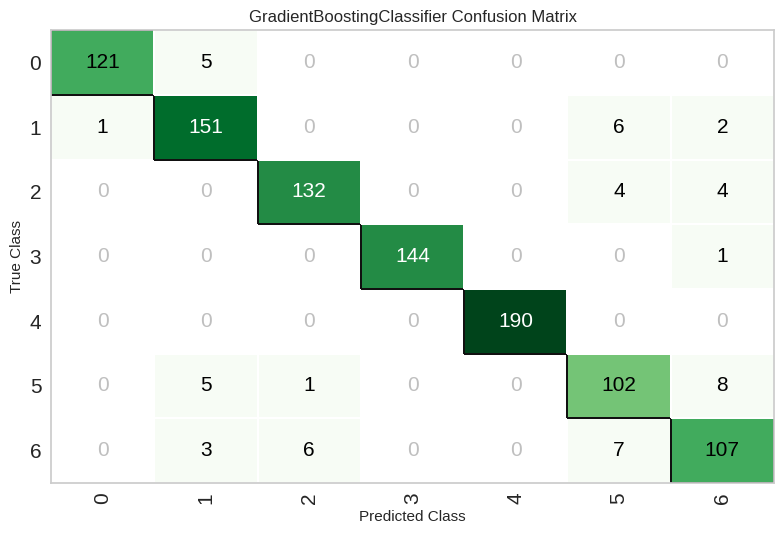

In [51]:
plot_model(finalized_model, plot='confusion_matrix')

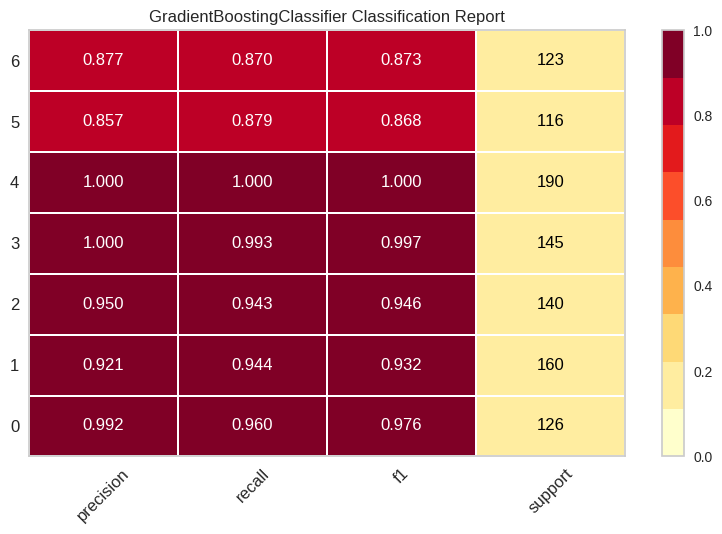

In [53]:
plot_model(finalized_model, plot='class_report')

A method to find the model that takes least time

In [54]:
import time
models_to_compare = ['knn', 'nb', 'et']

model_timings = {}

for model in models_to_compare:
    start_time = time.time()
    model_trained = create_model(model)
    end_time = time.time()
    model_timings[model] = end_time - start_time

for model, timing in model_timings.items():
    print(f"Model: {model}, Training Time: {timing:.4f} seconds")

fastest_model = min(model_timings, key=model_timings.get)
print(f"The fastest model among given is: {fastest_model} with a training time of {model_timings[fastest_model]:.4f} seconds")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4350,0.8061,0.4350,0.4382,0.4322,0.3358,0.3368
1,0.4125,0.8109,0.4125,0.4062,0.4074,0.3106,0.3110
2,0.4500,0.8214,0.4500,0.4458,0.4461,0.3534,0.3539
3,0.4000,0.8289,0.4000,0.3985,0.3961,0.2953,0.2962
4,0.4650,0.8375,0.4650,0.4602,0.4595,0.3713,0.3722
5,0.4025,0.8265,0.4025,0.4027,0.3973,0.2981,0.2989
6,0.4425,0.8353,0.4425,0.4413,0.4382,0.3450,0.3461
7,0.3950,0.8165,0.3950,0.3868,0.3887,0.2905,0.2911
8,0.4375,0.8086,0.4375,0.4388,0.4351,0.3417,0.3425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6175,0.9137,0.6175,0.6266,0.5916,0.5511,0.5596
1,0.6275,0.9258,0.6275,0.6585,0.6087,0.5628,0.5724
2,0.5700,0.9071,0.5700,0.5727,0.5385,0.4949,0.5057
3,0.6275,0.9142,0.6275,0.6273,0.6000,0.5626,0.5702
4,0.6150,0.9228,0.6150,0.6132,0.5814,0.5483,0.5579
5,0.5875,0.9170,0.5875,0.6005,0.5464,0.5159,0.5289
6,0.6100,0.9108,0.6100,0.6102,0.5732,0.5423,0.5523
7,0.6225,0.9230,0.6225,0.6293,0.5997,0.5575,0.5652
8,0.6150,0.8965,0.6150,0.6197,0.5848,0.5479,0.5578


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8250,0.9746,0.8250,0.8249,0.8240,0.7947,0.7951
1,0.8600,0.9818,0.8600,0.8578,0.8579,0.8358,0.8361
2,0.8250,0.9752,0.8250,0.8300,0.8224,0.7945,0.7959
3,0.8375,0.9768,0.8375,0.8398,0.8368,0.8093,0.8099
4,0.8625,0.9765,0.8625,0.8609,0.8614,0.8387,0.8388
5,0.8475,0.9841,0.8475,0.8449,0.8440,0.8211,0.8217
6,0.8350,0.9728,0.8350,0.8387,0.8348,0.8067,0.8075
7,0.8425,0.9739,0.8425,0.8416,0.8405,0.8152,0.8158
8,0.7825,0.9678,0.7825,0.7839,0.7826,0.7450,0.7452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Model: knn, Training Time: 10.1963 seconds
Model: nb, Training Time: 2.5245 seconds
Model: et, Training Time: 10.6486 seconds
The fastest model among given is: nb with a training time of 2.5245 seconds


In [60]:
save_model(bestModel, 'obesity_pred_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'Age', 'Height', 'Weight',
                                              'frequency_of_consumption_of_vegetables',
                                              'number_of_main_meals',
                                              'consumption_of_water_daily',
                                              'physical_activity...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes

In [61]:
lm = load_model('obesity_pred_model')

Transformation Pipeline and Model Successfully Loaded


In [62]:
lm

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'Age', 'Height', 'Weight',
                                             'frequency_of_consumption_of_vegetables',
                                             'number_of_main_meals',
                                             'consumption_of_water_daily',
                                             'physic...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

Unseen dataset as test set

In [63]:
import pandas as pd
data = pd.read_csv('test_modified.csv')
print(data.head)

<bound method NDFrame.head of         id  Gender        Age    Height      Weight  \
0     4999  Female  31.274628  1.670000   71.602622   
1     5000  Female  18.947102  1.647811   85.079589   
2     5001  Female  37.524551  1.548178   80.000000   
3     5002    Male  20.000000  1.770000   70.000000   
4     5003    Male  34.389679  1.733875   84.557797   
...    ...     ...        ...       ...         ...   
5012  5017    Male  19.000000  1.700000   85.000000   
5013  5018  Female  22.998709  1.583943   44.316254   
5014  5019  Female  21.000000  1.590000   50.000000   
5015  5020    Male  23.000000  1.800000   97.000000   
5016  5021  Female  25.968792  1.641601  104.988925   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                               yes                                       yes   
1                               yes                                       yes   
2                               yes                               

In [64]:
dup_data = data.duplicated()
duplicates = data[dup_data]
print(duplicates)

        id  Gender        Age    Height      Weight  \
5000  5005  Female  33.185661  1.707557   77.647716   
5001  5006  Female  26.000000  1.625537  105.000276   
5002  5007  Female  23.000000  1.550000   50.000000   
5003  5008  Female  21.760734  1.707508  121.310257   
5004  5009  Female  21.695892  1.694439  133.888629   
5005  5010    Male  21.000000  1.620000   58.000000   
5006  5011  Female  27.000000  1.740000   74.000000   
5007  5012    Male  23.000000  1.721854   81.650778   
5008  5013    Male  24.739421  1.867140  120.980508   
5009  5014  Female  21.832995  1.580964   65.363941   
5010  5015    Male  17.000000  1.690000   65.000000   
5011  5016    Male  30.899219  1.909639  129.232708   
5012  5017    Male  19.000000  1.700000   85.000000   
5013  5018  Female  22.998709  1.583943   44.316254   
5014  5019  Female  21.000000  1.590000   50.000000   
5015  5020    Male  23.000000  1.800000   97.000000   
5016  5021  Female  25.968792  1.641601  104.988925   

     fami

In [65]:
data = data.drop_duplicates()
print(data)

        id  Gender        Age    Height      Weight  \
0     4999  Female  31.274628  1.670000   71.602622   
1     5000  Female  18.947102  1.647811   85.079589   
2     5001  Female  37.524551  1.548178   80.000000   
3     5002    Male  20.000000  1.770000   70.000000   
4     5003    Male  34.389679  1.733875   84.557797   
...    ...     ...        ...       ...         ...   
4995  9994    Male  18.000000  1.750000   86.000000   
4996  9995    Male  23.096353  1.819867  105.428628   
4997  9996    Male  22.884722  1.806947  105.696358   
4998  9997    Male  18.000000  1.680000   68.000000   
4999  9998    Male  25.920738  1.823755  118.669906   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                               yes                                       yes   
1                               yes                                       yes   
2                               yes                                       yes   
3              

In [66]:
mask = data.isna().any(axis = 1) | (data == " ").any(axis = 1)

if mask.any().any():
  print(data[mask])
else:
  print("No Empty Vals")

        id  Gender   Age  Height  Weight family_history_with_overweight  \
4979  9978    Male  23.0    1.77   105.0                            yes   
4981  9980  Female  21.0    1.59    60.0                            yes   

     frequent_consumption_of_high_caloric_food  \
4979                                       yes   
4981                                       yes   

      frequency_of_consumption_of_vegetables  number_of_main_meals  \
4979                                     2.0                   3.0   
4981                                     2.0                   1.0   

     consumption_of_food_between_meals SMOKE  consumption_of_water_daily  \
4979                               NaN    no                         3.0   
4981                         Sometimes    no                         NaN   

     calories_consumption_monitoring  physical_activity_frequency  \
4979                              no                          3.0   
4981                              no         

In [67]:
data.loc[4979, 'consumption_of_food_between_meals'] = data['consumption_of_food_between_meals'].mode().iloc[0]
data.loc[4981, 'consumption_of_water_daily'] = data['consumption_of_water_daily'].mean()

In [68]:
mask = data.isna().any(axis = 1) | (data == " ").any(axis = 1)

if mask.any().any():
  print(data[mask])
else:
  print("No Empty Vals")

No Empty Vals


In [69]:
data.to_csv('clean_test_data.csv')

In [70]:
print(data)

        id  Gender        Age    Height      Weight  \
0     4999  Female  31.274628  1.670000   71.602622   
1     5000  Female  18.947102  1.647811   85.079589   
2     5001  Female  37.524551  1.548178   80.000000   
3     5002    Male  20.000000  1.770000   70.000000   
4     5003    Male  34.389679  1.733875   84.557797   
...    ...     ...        ...       ...         ...   
4995  9994    Male  18.000000  1.750000   86.000000   
4996  9995    Male  23.096353  1.819867  105.428628   
4997  9996    Male  22.884722  1.806947  105.696358   
4998  9997    Male  18.000000  1.680000   68.000000   
4999  9998    Male  25.920738  1.823755  118.669906   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                               yes                                       yes   
1                               yes                                       yes   
2                               yes                                       yes   
3              

NOW THE DATA IS PREPROCESSED AND WE TEST OUR MODEL WITH THIS DATA



In [72]:
predictions = predict_model(lm, data)
print(predictions.head())

     id  Gender        Age    Height     Weight  \
0  4999  Female  31.274628  1.670000  71.602623   
1  5000  Female  18.947102  1.647811  85.079590   
2  5001  Female  37.524551  1.548178  80.000000   
3  5002    Male  20.000000  1.770000  70.000000   
4  5003    Male  34.389679  1.733875  84.557800   

  family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                            yes                                       yes   
1                            yes                                       yes   
2                            yes                                       yes   
3                            yes                                       yes   
4                            yes                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.843709              1.599464   
1                                2.911749              3.000000   
2                      

In [73]:
predictions.to_csv('test_predictions.csv')

In [75]:
evaluate_model(lm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…